<a href="https://colab.research.google.com/github/dlrbdjs/linear_algebra2_personal/blob/main/202110958_%EC%9D%B4%EA%B7%9C%EC%96%B8_AI%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim

In [2]:
x_train = torch.FloatTensor([[5], [5], [10], [15], [17], [20]])
y_train = torch.FloatTensor(([50], [61], [73], [91], [94], [99]))

In [3]:
#가중치 (Weight, W)를 0으로 설정
W=torch.zeros(1, requires_grad=True)

In [4]:
#편향(Bias, b)또한 0으로 설정
b=torch.zeros(1, requires_grad=True)

In [5]:
# #선형 회귀의 가설 H(x) = Wx + b
hypothesis = x_train * W + b

In [6]:
#평균 제곱 오차
cost = torch.mean((hypothesis - y_train)**2)

In [7]:
#SGD는 Gradient Descent의 일종
optimizer = optim.SGD([W, b], lr = 0.001)

In [8]:
#학습 진행
# Epoch : 20000으로 설정
epoch = 20000
for i in range(epoch):
    #가설 함수 갱신
    hypothesis = x_train * W + b
    #비용 함수 값 갱신
    cost = torch.mean((hypothesis - y_train)**2)

    optimizer.zero_grad()
    #Cost function을 미분하여 W와 b에 대한 gradient(기울기) 자동 계산
    cost.backward()

    #W, b 값 갱신(W, b에다가 (기울기 값 * lr) 해서 뺴주는 Gradient descent 공식을 따름)
    optimizer.step()

    # 2000 epoch 마다 현재 W, b, cost값 출력
    if(i+1) % 2000 == 0:
        print("Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}".format(
            i+1, epoch, W.item(), b.item(), cost.item()))

Epoch 2000/20000 W: 4.370, b: 21.940 Cost: 85.573975
Epoch 4000/20000 W: 3.680, b: 32.132 Cost: 30.957300
Epoch 6000/20000 W: 3.353, b: 36.952 Cost: 18.736231
Epoch 8000/20000 W: 3.199, b: 39.233 Cost: 16.001619
Epoch 10000/20000 W: 3.126, b: 40.312 Cost: 15.389733
Epoch 12000/20000 W: 3.091, b: 40.822 Cost: 15.252814
Epoch 14000/20000 W: 3.075, b: 41.063 Cost: 15.222169
Epoch 16000/20000 W: 3.067, b: 41.177 Cost: 15.215306
Epoch 18000/20000 W: 3.063, b: 41.231 Cost: 15.213772
Epoch 20000/20000 W: 3.062, b: 41.257 Cost: 15.213428


단순 로지스틱 회귀

In [9]:
import torch.nn.functional as F
import torch
import torch.optim as optim

In [10]:
x_train = torch.FloatTensor([[5], [13], [15], [17], [20], [21]])
y_train = torch.FloatTensor(([0], [0], [0], [1], [1], [1]))

In [11]:
#가중치 (Weight, W)를 0으로 설정
W=torch.zeros(1, requires_grad=True)

In [12]:
#편향(Bias, b)또한 0으로 설정
b=torch.zeros(1, requires_grad=True)

In [13]:
# #로지스틱 회귀의 가설 H(x) = sigmoid(Wx + b)
hypothesis = torch.sigmoid(x_train * W + b)

In [14]:
# #크로스 엔트로피 함수
cost = F.binary_cross_entropy(hypothesis, y_train)

In [15]:
#옵티마이저 설정
optimizer = optim.SGD([W, b], lr = 0.001)

In [16]:
#학습 진행
# Epoch : 20000으로 설정
epoch = 20000
for i in range(epoch):
    #가설 함수 갱신
    hypothesis = torch.sigmoid(x_train * W + b)
    #비용 함수 값 갱신
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    #Cost function을 미분하여 W와 b에 대한 gradient(기울기) 자동 계산
    cost.backward()

    #W, b 값 갱신(W, b에다가 (기울기 값 * lr) 해서 뺴주는 Gradient descent 공식을 따름)
    optimizer.step()

    # 2000 epoch 마다 현재 W, b, cost값 출력
    if(i+1) % 2000 == 0:
        print("Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}".format(
            i+1, epoch, W.item(), b.item(), cost.item()))

Epoch 2000/20000 W: 0.047, b: -0.236 Cost: 0.630780
Epoch 4000/20000 W: 0.061, b: -0.462 Cost: 0.605159
Epoch 6000/20000 W: 0.073, b: -0.677 Cost: 0.582104
Epoch 8000/20000 W: 0.085, b: -0.880 Cost: 0.561326
Epoch 10000/20000 W: 0.097, b: -1.073 Cost: 0.542557
Epoch 12000/20000 W: 0.108, b: -1.257 Cost: 0.525554
Epoch 14000/20000 W: 0.118, b: -1.433 Cost: 0.510101
Epoch 16000/20000 W: 0.128, b: -1.601 Cost: 0.496010
Epoch 18000/20000 W: 0.138, b: -1.761 Cost: 0.483114
Epoch 20000/20000 W: 0.147, b: -1.914 Cost: 0.471270


In [17]:
test_input = torch.FloatTensor([[15.5]])
result = torch.sigmoid(test_input * W + b)
print(result)

tensor([[0.5906]], grad_fn=<SigmoidBackward0>)


In [18]:
#기준점을 설정하여 결과 값을 True/False 결과로 분류
#기준점을 0.5로 설정하여 분류
threshold = 0.5
predict = result >= torch.FloatTensor([threshold])
print(predict)

tensor([[True]])


MNIST 데이터로 숫자 분류

In [19]:
#소프트맥스 회귀 구현
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [20]:
#학습 환경 설정
device = torch.device("cpu")
#for reproductibility
random.seed(777)
torch.manual_seed(777)
#하이퍼 파라미터 설정
training_epochs = 15
batch_size = 100

In [21]:
#MNIST 데이터 셋 다운로드
# 60000개의 train data, 10000개 test data
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train = True,
                          transform=transforms.ToTensor(),
                          download = True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                          train = False,
                          transform=transforms.ToTensor(),
                          download = True)
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,shuffle = True,
                         drop_last=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5989824.21it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160863.51it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1514110.37it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2069584.87it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [22]:
#모델 설정
#MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias = True).to(device)

In [23]:
#비용함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [24]:
#학습 진행
# 60000개의 train data, 10000개의 test data
#back-propagation
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train = True,
                          transform=transforms.ToTensor(),
                          download = True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                          train = False,
                          transform=transforms.ToTensor(),
                          download = True)
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,shuffle = True,
                         drop_last=True)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy :  0.10050000250339508
Label:  8
Prediction :  9


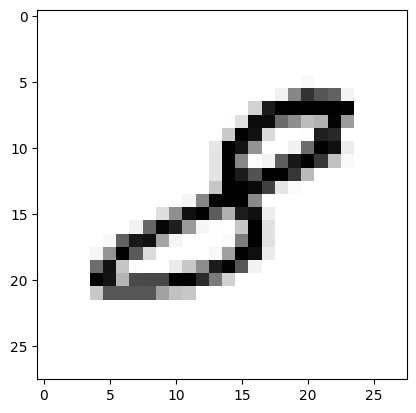

In [25]:
#테스트 데이터를 사용하여 모델을 테스트한다.
#torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28* 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy : ", accuracy.item())

    #MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print("Label: ", Y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction : ", torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap="Greys",
               interpolation = 'nearest')

    plt.show()